# Aykırı Gözlem Analizi

## Aykırı Değerleri Yakalamak

In [24]:
import seaborn as sns
df = sns.load_dataset("diamonds") #seabornun içinde diamonds verisetini aldık
df = df.select_dtypes(include = ["float64", "int64"]) #sadece sayısal verilere ulaşmak için tip seçimi gerçekleştirdik
df = df.dropna() #veriseti içerisindeki eksik değerleri direkt sildik
df.head() #ilk beş değer gelsin

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [25]:
df_table = df["table"] #bir tane değişkeni seçip, üzerinde çalışalım
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

<AxesSubplot:xlabel='table'>

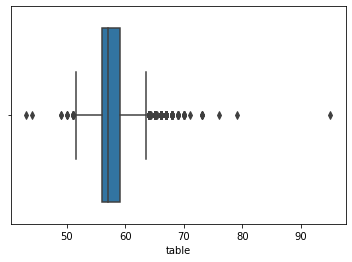

In [26]:
sns.boxplot(x = df_table) #boxplot ile görselleştirelim, x imizi dftable olarak ifade ettik

In [27]:
#şimdi eşik değer belirlememiz gerekiyor.
Q1 = df_table.quantile(0.25) #quantile ile verisetinin değişkeninin küçükten büyüğe yüzde 25.indexine karşılık gelen değer
Q3 = df_table.quantile(0.75) #bu da yüzde 75.indexine karşılık gelen değeri alacak
IQR = Q3-Q1 #verisetinin %25lik indexine karşılık gelen değer ve %75lik indexine karşılık gelen değerler üzerinden bir değer hesaplayacağız.

In [7]:
Q1

56.0

In [8]:
Q3

59.0

In [9]:
IQR

3.0

In [28]:
alt_sinir = Q1 - 1.5*IQR #1.çeyrek değerimizden 1.5*IQR kadar aşağısını alt sınır olarak belirle demek
ust_sinir = Q3 + 1.5*IQR #3.çeyrek değerimizden 1.5*IQR kadar yukarısını üst sınır olarak belirle demek

In [11]:
alt_sinir

51.5

In [12]:
ust_sinir

63.5

In [29]:
#şimdi aykırı değerlere erişelim. Önce aykırı değer sorgulamasın yapalım
df_table < alt_sinir #bu koşulu her birgözlem değeri için değişken içerisindeki her bir değer için sorguladı, şartı sağlayanları true dedi

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [14]:
(df_table < alt_sinir) | (df_table > ust_sinir) #burada: alt sınırdan küçük ya da üst sınırdan büyük olanları sorguladı. 
#herhangi biri true ise true

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [30]:
aykiri_tf = (df_table < alt_sinir) #şimdi, bu şartı sağlayan elemanlara erişmek istiyoruz-aykırılar (aykırı true false)

In [31]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [32]:
df_table[aykiri_tf] #dftable içerisindeki şu indexe gitmek istiyoruz, eleman seçmek istiyoruz. 
#Aykırı değerler indexleriyle beraber ede ettik. dftable içerisine aykiritf i gönderdik true olanları önümüze gönderdi.

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [18]:
df_table[aykiri_tf].index #sadece indexlere bakmak istersek bunun ile kolayca elde edebiliriz

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

### AYKIRI DEĞER PROBLEMİNİ ÇÖZMEK

In [33]:
df_table[aykiri_tf] #tek değişkenli aykırı gözlem analizi çözümleri

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

### Silme Yaklaşımı

In [37]:
import pandas as pd #dataframe operasyonu yapabilmek için pandası import ettik

In [38]:
type(df_table) # pandas serisi şeklinde şu an. Biz bunu dataframe e çevirmeliyiz

pandas.core.series.Series

In [39]:
df_table = pd.DataFrame(df_table)

In [40]:
df_table.shape

(53940, 1)

In [41]:
temiz_df = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis = 1)]

In [ ]:
# şimdi dedik ki, aykırı olmayan değerlere ulaştık. 
# Nasıl? dftable içinde belirlenen koşullardan biri ya da diğeri SAĞLAMIYORSA 
# (~ (tilda işareti) => koşulu sağlamayanları al demek) bunları al demek. Yani aykırılar dışındakileri buluyoruz. 
# Any(axis=1) ile sütun bazında işlem yapmak için

In [42]:
temiz_df

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [43]:
temiz_df.shape #(605 adet aykırı gözlem değeri çıkartmış olduk)

(53335, 1)

### Ortalama ile Doldurma işlemi

In [45]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64", "int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [46]:
df_table = df["table"] #verisetimizi tekrar oluşturduk

In [47]:
aykiri_tf.head() 

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [48]:
#Silme kısmında aykırıları yakalayıp sildik.Bu sefer amacımız, yakalayacağımız aykırıları, ortalama değer
#ile değiştirmek istiyoruz. Yani aykırıların taşıdığı bilgileri de göz önünde bulunduralım ama bunları
#ortalama ile dolduralım. ortalama ile değiştirelim.

In [49]:
df_table[aykiri_tf] #buradasadece alt sınıra göre zira yukarıda alt sınırı seçmiştik sadece

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [50]:
df_table.mean() #ortalaması bu imiş.

57.45718390804598

In [51]:
df_table[aykiri_tf] = df_table.mean() #aykırı olanlara artık mean değerini veriyoruz.uyarıyı görmezden gelelim

/Users/mustafa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
df_table[aykiri_tf] #artık aykırıların değerleri, ortalama değer ile değişmiş oldu.

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

### Baskılama Yöntemi ile İşlem

In [53]:
#bu yöntemde ise aykırılar yakalandıktan sonra, üst taraftaysa, üst sınır değerine eşitlnir.
# alt tarafta ise alt sınır değerine eşitlenir. neden? mesela ortalam değer ile üst sınır araasında fazla mesafe var ise,
#bu yöntem yararlı olur. taşıdığı bilgiyi özüne uygun şekilde veriseti içerisinde tutabiliriz.

In [56]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64", "int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [57]:
df_table = df["table"]

In [58]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [59]:
alt_sinir

51.5

In [60]:
df_table[aykiri_tf] = alt_sinir #alt sinira eşitlemiş olduk. uyarıyı boş verelim. alt sınıra baskılamış olduk

/Users/mustafa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
df_table[aykiri_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64